<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/Cifar10/add_dense/Cifar10_decision_tree_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.2996 - loss: 1.8574
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5115 - loss: 1.3479
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5707 - loss: 1.1988
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6044 - loss: 1.1072
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6307 - loss: 1.0349
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6486 - loss: 0.9864
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6617 - loss: 0.9575
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6707 - loss: 0.9266
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6828 - loss: 0.8973
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6904 - loss: 0.8702


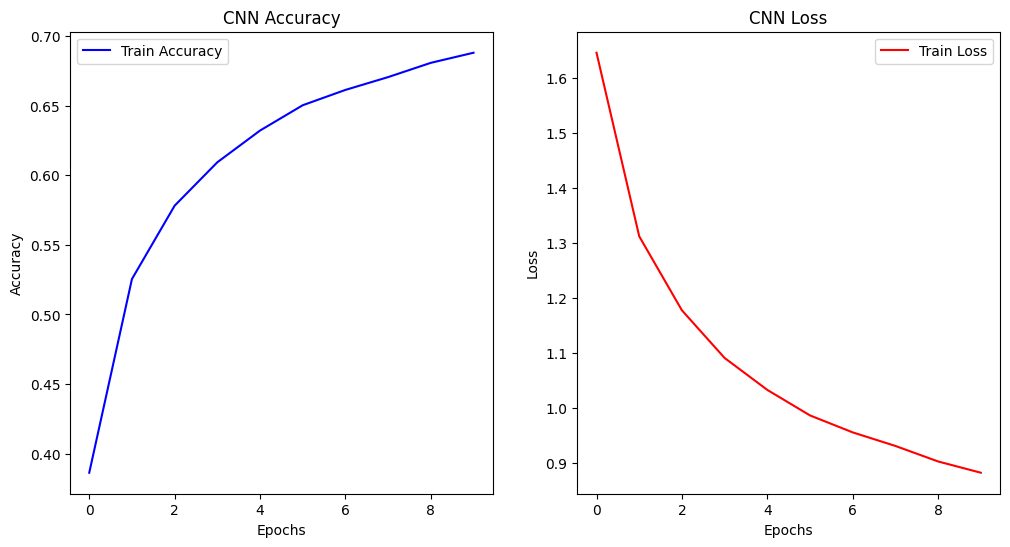

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Features Shape: (50000, 256)
Test Features Shape: (10000, 256)


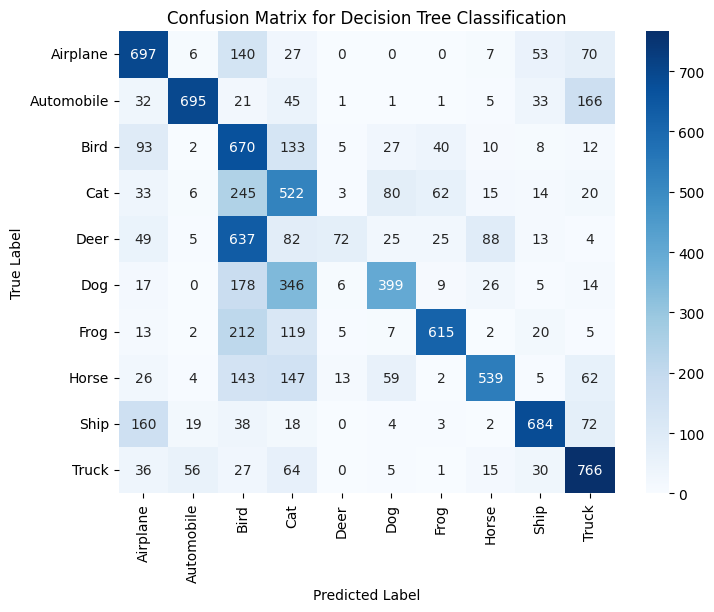

Decision Tree Accuracy: 0.5659


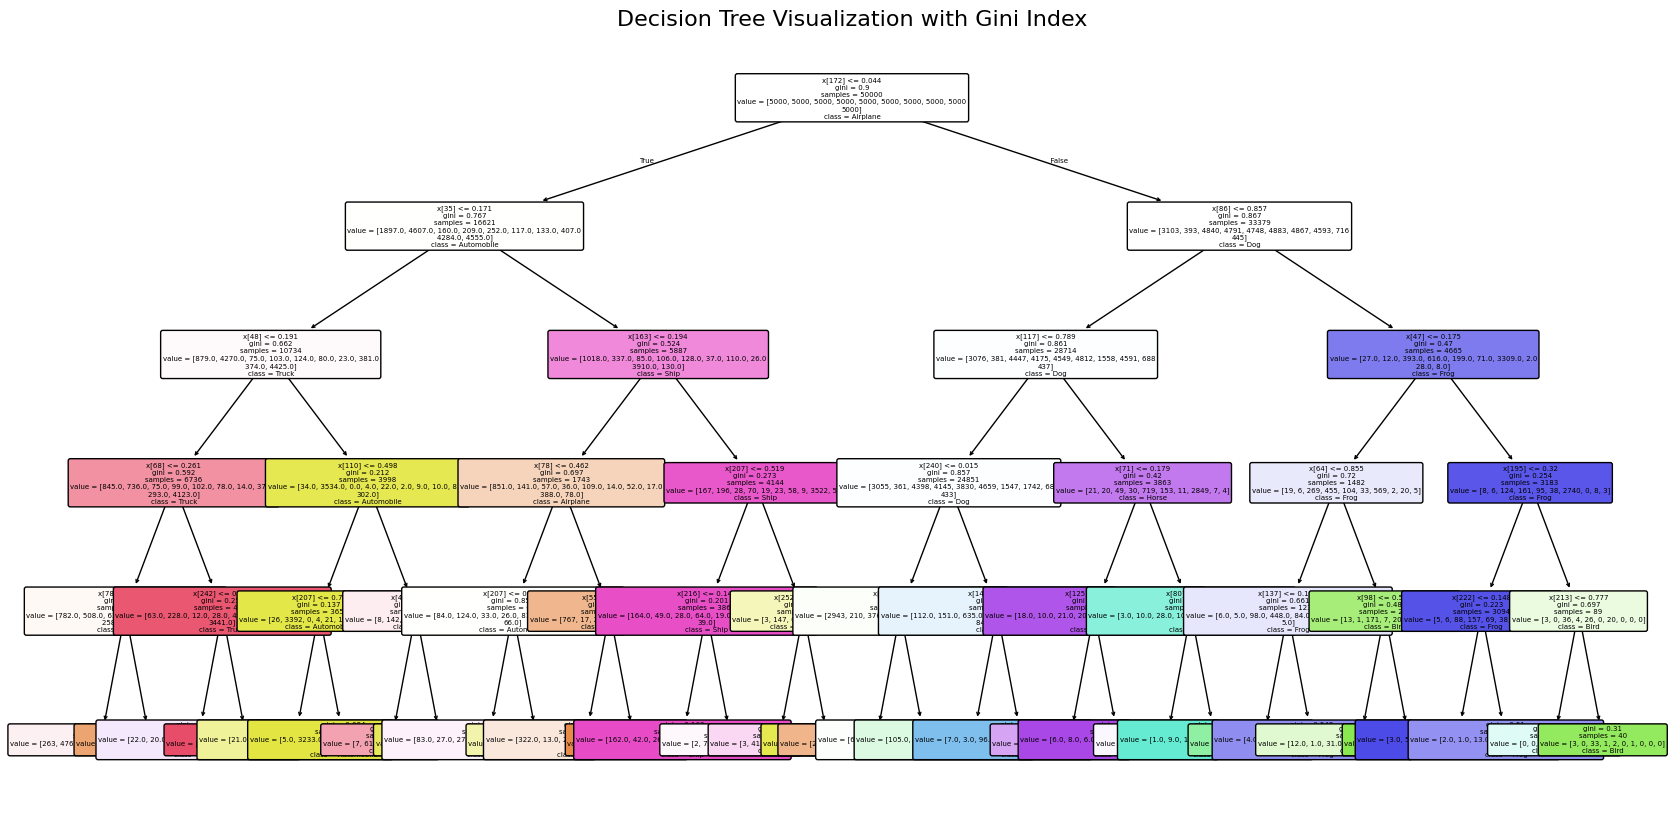

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Flatten


# CIFAR-10 클래스 이름 정의
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# CIFAR-10 데이터셋 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# 원핫 인코딩
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=len(class_names))

# CNN 모델 정의
cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(len(class_names), activation='softmax')  # Class output layer
])

# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
history = cnn_model.fit(X_train, y_train_onehot, epochs=10)

# CNN 정확도, 손실 그래프
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# CNN 특성 추출
feature_extractor = Sequential(cnn_model.layers[:-1])  # Output layer 제외
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# DecisionTreeClassifier를 사용한 학습
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train_features, y_train.ravel())  # y_train.ravel()으로 1D 형태로 변환

# 예측
y_pred = decision_tree.predict(X_test_features)

# 혼동 행렬 계산
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classification')
plt.show()

# 정확도 출력
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    filled=True,
    class_names=class_names,
    rounded=True,
    fontsize=5,
    impurity=True  # 순도 표시하기
)
plt.title('Decision Tree Visualization with Gini Index', fontsize=16)
plt.show()


X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2956 - loss: 1.8824
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5067 - loss: 1.3687
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5630 - loss: 1.2266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5966 - loss: 1.1267
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6155 - loss: 1.0686
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6399 - loss: 1.0109
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6546 - loss: 0.9784
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6595 - loss: 0.9552
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6740 - loss: 0.9239
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6814 - loss: 0.9002


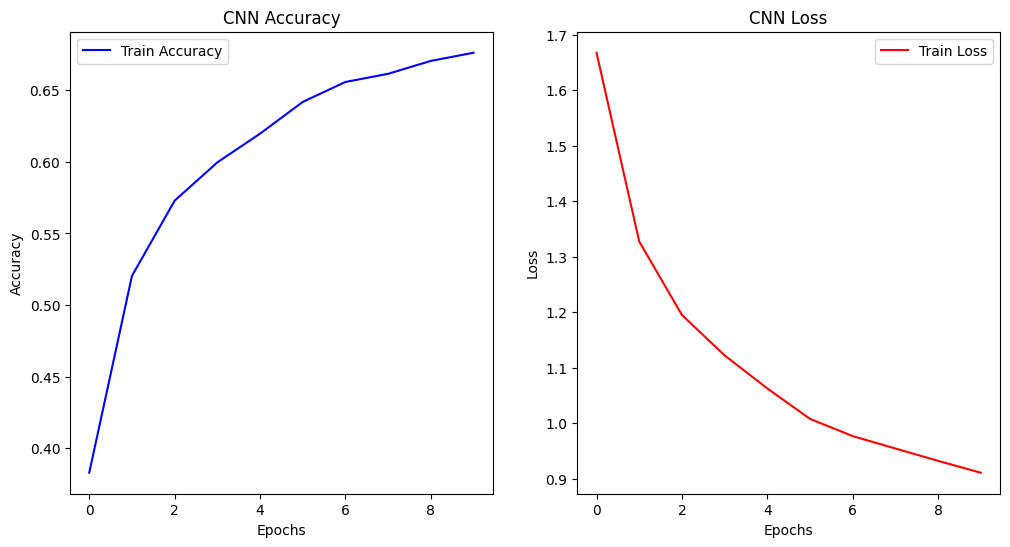

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Features Shape: (50000, 256)
Test Features Shape: (10000, 256)
Random Forest Accuracy: 0.7149


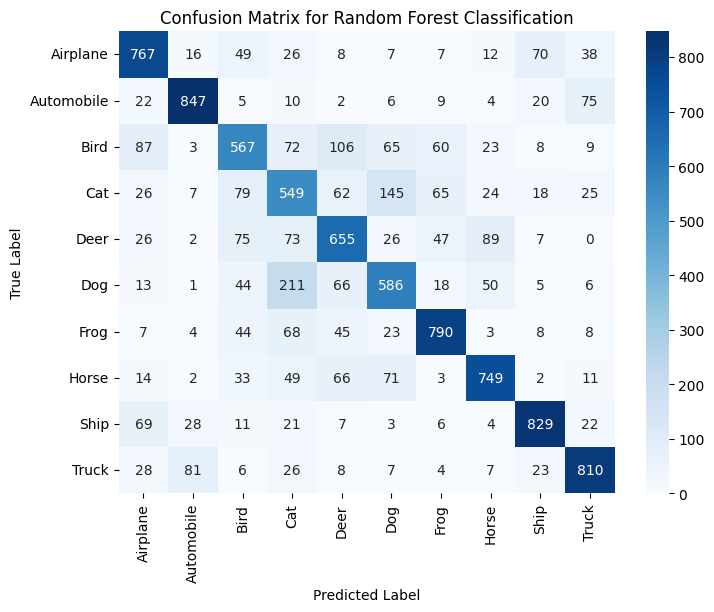

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# CIFAR-10 클래스 이름 정의
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# CIFAR-10 데이터셋 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# 원핫 인코딩
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=len(class_names))

# CNN 모델 정의
cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(len(class_names), activation='softmax')  # Class output layer
])


# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
history = cnn_model.fit(X_train, y_train_onehot, epochs=10)

# CNN 정확도와 손실 함수 시각화
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# CNN 특성 추출
feature_extractor = Sequential(cnn_model.layers[:-1])  # Output layer 제외
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# Random Forest 모델 정의
random_forest = RandomForestClassifier(
    n_estimators=100,  # 트리 개수
    max_depth=10,      # 트리 최대 깊이
    random_state=42,   # 랜덤 시드
    n_jobs=-1          # 병렬 처리
)

# Random Forest 모델 학습
random_forest.fit(X_train_features, y_train.ravel())

# 예측
y_pred_rf = random_forest.predict(X_test_features)

# 정확도 출력
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# 혼동 행렬 계산 및 시각화
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classification')
plt.show()
